<b>This part of code normalises data and tests for differnt learning rates . Corresponding weights and SSE's are stored in CSV file 
which are later used for finding best learning rate and then use the best learning rate to find the best lambda</b>

In [ ]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
%matplotlib inline

In [3]:
main_df = pd.read_csv('PA1_train.csv.xls')

In [4]:
sns.__version__

'0.9.0'

In [5]:
main_df.head()

,dummy,id,date,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,price
0,1,3066410850,7/9/2014,4,2.50,2720,10006,2.0,0,0,...,2720,0,1989,0,98074,47.6295,-122.042,2720,10759,5.9495
1,1,9345400350,7/18/2014,2,2.50,2600,5000,1.0,0,0,...,1300,1300,1926,0,98126,47.5806,-122.379,2260,5000,6.6500
2,1,7128300060,7/7/2014,5,1.75,1650,3000,1.5,0,0,...,1650,0,1902,0,98144,47.5955,-122.306,1740,4000,4.4300
3,1,2155500030,4/28/2015,4,1.75,1720,9600,1.0,0,0,...,1720,0,1969,0,98059,47.4764,-122.155,1660,10720,3.8000
4,1,3999300080,9/4/2014,6,2.25,3830,11180,1.0,0,2,...,2440,1390,1962,0,98008,47.5849,-122.113,2500,10400,8.8700


In [6]:
main_df.isnull().any()

dummy            False
id               False
date             False
bedrooms         False
bathrooms        False
sqft_living      False
sqft_lot         False
floors           False
waterfront       False
view             False
condition        False
grade            False
sqft_above       False
sqft_basement    False
yr_built         False
yr_renovated     False
zipcode          False
lat              False
long             False
sqft_living15    False
sqft_lot15       False
price            False
dtype: bool

In [7]:
main_df.isna().any()

dummy            False
id               False
date             False
bedrooms         False
bathrooms        False
sqft_living      False
sqft_lot         False
floors           False
waterfront       False
view             False
condition        False
grade            False
sqft_above       False
sqft_basement    False
yr_built         False
yr_renovated     False
zipcode          False
lat              False
long             False
sqft_living15    False
sqft_lot15       False
price            False
dtype: bool

In [8]:
main_df.columns

Index(['dummy', 'id', 'date', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long', 'sqft_living15', 'sqft_lot15', 'price'],
      dtype='object')

In [9]:
print(len(main_df.columns))

22


In [10]:
df = main_df.drop(['dummy','id'],1) #dropped dummy variable and id

In [11]:
df['date'] = pd.to_datetime(main_df['date'])

In [12]:
df['month'] = df['date'].apply(lambda x:x.month)

In [13]:
df['year'] =  df['date'].apply(lambda x:x.year)
df['day'] = df['date'].apply(lambda x:x.day)

In [14]:
df.columns

Index(['date', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors',
       'waterfront', 'view', 'condition', 'grade', 'sqft_above',
       'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode', 'lat', 'long',
       'sqft_living15', 'sqft_lot15', 'price', 'month', 'year', 'day'],
      dtype='object')

In [15]:
df.describe()

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,...,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,price,month,year,day
count,10000.000000,10000.000000,10000.000000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.00000,10000.00000,10000.000000,...,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,3.375200,2.118875,2080.223200,1.508920e+04,1.503700,0.007000,0.229400,3.40910,7.67320,1793.099300,...,81.226700,98078.293100,47.559814,-122.213287,1994.326100,12746.323400,5.385297,6.592400,2014.318500,15.802100
std,0.943246,0.765128,911.334358,4.120389e+04,0.542647,0.083377,0.755932,0.65359,1.18006,830.865434,...,394.379804,53.518391,0.138651,0.141405,691.900301,28241.243043,3.573901,3.111435,0.465918,8.621761
min,1.000000,0.500000,370.000000,5.720000e+02,1.000000,0.000000,0.000000,1.00000,4.00000,370.000000,...,0.000000,98001.000000,47.155900,-122.514000,460.000000,660.000000,0.820000,1.000000,2014.000000,1.000000
25%,3.000000,1.750000,1430.000000,5.035500e+03,1.000000,0.000000,0.000000,3.00000,7.00000,1190.000000,...,0.000000,98033.000000,47.470200,-122.328000,1490.000000,5092.000000,3.250000,4.000000,2014.000000,8.000000
50%,3.000000,2.250000,1920.000000,7.620000e+03,1.500000,0.000000,0.000000,3.00000,7.00000,1560.000000,...,0.000000,98065.000000,47.571300,-122.230000,1850.000000,7620.000000,4.500000,6.000000,2014.000000,16.000000
75%,4.000000,2.500000,2550.000000,1.075050e+04,2.000000,0.000000,0.000000,4.00000,8.00000,2230.000000,...,0.000000,98117.250000,47.677400,-122.125000,2380.000000,10095.750000,6.481880,9.000000,2015.000000,23.000000
max,33.000000,7.750000,9890.000000,1.651359e+06,3.500000,1.000000,4.000000,5.00000,13.00000,8860.000000,...,2015.000000,98199.000000,47.777600,-121.319000,6110.000000,871200.000000,68.900000,12.000000,2015.000000,31.000000


In [16]:
df = df.drop(['date'],1)
print(df.columns)

Index(['bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors',
       'waterfront', 'view', 'condition', 'grade', 'sqft_above',
       'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode', 'lat', 'long',
       'sqft_living15', 'sqft_lot15', 'price', 'month', 'year', 'day'],
      dtype='object')


In [17]:
print(len(df.columns))

22


In [18]:
df.corr()

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,...,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,price,month,year,day
bedrooms,1.000000,0.492908,0.566724,0.026586,0.171673,-0.009237,0.082935,0.027587,0.345664,0.468981,...,0.011714,-0.151854,-0.014800,0.135611,0.387012,0.025704,0.304994,-0.008508,-0.001368,0.001814
bathrooms,0.492908,1.000000,0.753826,0.077894,0.514202,0.044960,0.189175,-0.132256,0.665506,0.688100,...,0.028823,-0.204217,0.014722,0.230576,0.575767,0.087405,0.524480,0.001503,-0.021985,0.003108
sqft_living,0.566724,0.753826,1.000000,0.172406,0.359159,0.080323,0.281434,-0.059997,0.764640,0.879322,...,0.030222,-0.199869,0.037184,0.252701,0.767427,0.187928,0.693156,0.002517,-0.020675,-0.004228
sqft_lot,0.026586,0.077894,0.172406,1.000000,-0.003914,0.030918,0.093269,-0.007812,0.111763,0.185731,...,0.008237,-0.127988,-0.091396,0.221079,0.145951,0.766928,0.090327,-0.011095,0.006196,0.010307
floors,0.171673,0.514202,0.359159,-0.003914,1.000000,0.019322,0.032063,-0.263973,0.463397,0.525619,...,-0.001851,-0.064221,0.047280,0.133802,0.285700,-0.014699,0.265757,0.021210,-0.029582,0.004475
waterfront,-0.009237,0.044960,0.080323,0.030918,0.019322,1.000000,0.387081,0.026360,0.056796,0.060511,...,0.061097,0.039637,-0.019403,-0.048597,0.075997,0.023875,0.222654,0.009457,-0.008483,0.012640
view,0.082935,0.189175,0.281434,0.093269,0.032063,0.387081,1.000000,0.054153,0.250313,0.168429,...,0.091935,0.077631,-0.003251,-0.072904,0.273224,0.073885,0.392961,-0.003188,-0.004157,0.004910
condition,0.027587,-0.132256,-0.059997,-0.007812,-0.263973,0.026360,0.054153,1.000000,-0.139661,-0.154599,...,-0.056667,0.015185,-0.000121,-0.117979,-0.095066,-0.003873,0.051306,0.009614,-0.026268,-0.006680
grade,0.345664,0.665506,0.764640,0.111763,0.463397,0.056796,0.250313,-0.139661,1.000000,0.758138,...,0.002488,-0.192635,0.109004,0.218135,0.719191,0.123551,0.671957,0.012392,-0.034950,-0.009886
sqft_above,0.468981,0.688100,0.879322,0.185731,0.525619,0.060511,0.168429,-0.154599,0.758138,1.000000,...,0.005719,-0.265109,-0.012607,0.357767,0.743508,0.199800,0.605777,0.009980,-0.023068,0.001827


In [19]:
before_normalization_corr=df.corr()['price']
(before_normalization_corr.sort_values())

zipcode         -0.048750
day             -0.024775
month           -0.008468
year             0.001692
long             0.025544
condition        0.051306
yr_built         0.057532
sqft_lot15       0.085476
sqft_lot         0.090327
yr_renovated     0.095046
waterfront       0.222654
floors           0.265757
sqft_basement    0.295117
bedrooms         0.304994
lat              0.307248
view             0.392961
bathrooms        0.524480
sqft_living15    0.589190
sqft_above       0.605777
grade            0.671957
sqft_living      0.693156
price            1.000000
Name: price, dtype: float64

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x00000213AF194DD8>,
      dtype=object)

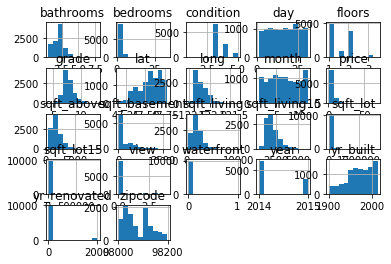

In [20]:

df.hist()

In [21]:
features = before_normalization_corr.keys()
print(len(features))
imprtant_features = [x for x in features if abs(before_normalization_corr[x])>0.1]

22


In [22]:
print(imprtant_features,len(imprtant_features))

['bedrooms', 'bathrooms', 'sqft_living', 'floors', 'waterfront', 'view', 'grade', 'sqft_above', 'sqft_basement', 'lat', 'sqft_living15', 'price'] 12


In [23]:
df = df[imprtant_features]
df.columns

Index(['bedrooms', 'bathrooms', 'sqft_living', 'floors', 'waterfront', 'view',
       'grade', 'sqft_above', 'sqft_basement', 'lat', 'sqft_living15',
       'price'],
      dtype='object')

In [24]:
y_train = df['price'] #y_train will contain predictor values for training set

In [25]:
y_train.value_counts().head()

3.25    84
3.50    81
4.50    80
4.25    76
4.00    71
Name: price, dtype: int64

In [26]:
df = df.drop(['price'],1) #dropped price from training data as its not needed in it
df.columns

Index(['bedrooms', 'bathrooms', 'sqft_living', 'floors', 'waterfront', 'view',
       'grade', 'sqft_above', 'sqft_basement', 'lat', 'sqft_living15'],
      dtype='object')

In [27]:
df.head()

,bedrooms,bathrooms,sqft_living,floors,waterfront,view,grade,sqft_above,sqft_basement,lat,sqft_living15
0,4,2.50,2720,2.0,0,0,9,2720,0,47.6295,2720
1,2,2.50,2600,1.0,0,0,8,1300,1300,47.5806,2260
2,5,1.75,1650,1.5,0,0,8,1650,0,47.5955,1740
3,4,1.75,1720,1.0,0,0,8,1720,0,47.4764,1660
4,6,2.25,3830,1.0,0,2,9,2440,1390,47.5849,2500


In [28]:
df.bedrooms.value_counts()

3     4489
4     3269
2     1282
5      730
6      117
1       90
7       14
9        3
8        3
11       1
10       1
33       1
Name: bedrooms, dtype: int64

In [29]:
df.isnull().any()

bedrooms         False
bathrooms        False
sqft_living      False
floors           False
waterfront       False
view             False
grade            False
sqft_above       False
sqft_basement    False
lat              False
sqft_living15    False
dtype: bool

In [30]:
df.isna().any()

bedrooms         False
bathrooms        False
sqft_living      False
floors           False
waterfront       False
view             False
grade            False
sqft_above       False
sqft_basement    False
lat              False
sqft_living15    False
dtype: bool

In [31]:
(df['view'].mean())

0.2294

In [32]:
for feature in df.columns:
    mn = df[feature].min()
    rnge = df[feature].max() - df[feature].min()
    df[feature] = df[feature].apply(lambda x : (x-mn)/rnge)

In [33]:
df.describe()

,bedrooms,bathrooms,sqft_living,floors,waterfront,view,grade,sqft_above,sqft_basement,lat,sqft_living15
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,0.074225,0.223293,0.179645,0.201480,0.007000,0.057350,0.408133,0.167621,0.105560,0.649693,0.271562
std,0.029476,0.105535,0.095728,0.217059,0.083377,0.188983,0.131118,0.097864,0.159928,0.223018,0.122460
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.062500,0.172414,0.111345,0.000000,0.000000,0.000000,0.333333,0.096584,0.000000,0.505549,0.182301
50%,0.062500,0.241379,0.162815,0.200000,0.000000,0.000000,0.333333,0.140165,0.000000,0.668168,0.246018
75%,0.093750,0.275862,0.228992,0.400000,0.000000,0.000000,0.444444,0.219081,0.202206,0.838829,0.339823
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [34]:
df.head()

,bedrooms,bathrooms,sqft_living,floors,waterfront,view,grade,sqft_above,sqft_basement,lat,sqft_living15
0,0.09375,0.275862,0.246849,0.4,0.0,0.0,0.555556,0.276796,0.000000,0.761782,0.400000
1,0.03125,0.275862,0.234244,0.0,0.0,0.0,0.444444,0.109541,0.477941,0.683127,0.318584
2,0.12500,0.172414,0.134454,0.2,0.0,0.0,0.444444,0.150766,0.000000,0.707093,0.226549
3,0.09375,0.172414,0.141807,0.0,0.0,0.0,0.444444,0.159011,0.000000,0.515522,0.212389
4,0.15625,0.241379,0.363445,0.0,0.0,0.5,0.555556,0.243816,0.511029,0.690043,0.361062


In [35]:
ln=[]
for exp in range(-2,8):
    ln.append(10**(-exp))
learning_rate = np.array(ln)
print(learning_rate)

[1.e+02 1.e+01 1.e+00 1.e-01 1.e-02 1.e-03 1.e-04 1.e-05 1.e-06 1.e-07]


In [36]:
df['dummy'] = main_df['dummy']

In [37]:
df.head()

,bedrooms,bathrooms,sqft_living,floors,waterfront,view,grade,sqft_above,sqft_basement,lat,sqft_living15,dummy
0,0.09375,0.275862,0.246849,0.4,0.0,0.0,0.555556,0.276796,0.000000,0.761782,0.400000,1
1,0.03125,0.275862,0.234244,0.0,0.0,0.0,0.444444,0.109541,0.477941,0.683127,0.318584,1
2,0.12500,0.172414,0.134454,0.2,0.0,0.0,0.444444,0.150766,0.000000,0.707093,0.226549,1
3,0.09375,0.172414,0.141807,0.0,0.0,0.0,0.444444,0.159011,0.000000,0.515522,0.212389,1
4,0.15625,0.241379,0.363445,0.0,0.0,0.5,0.555556,0.243816,0.511029,0.690043,0.361062,1


In [38]:
df.shape[0]

10000

In [39]:
import math
def norm_cal(a,b):
    s = sum(a*b)
    #print('called',a)
    return s
#norm_cal(np.array([1,3]),np.array([2,4]))
        

In [40]:
((df.iloc[0]))

bedrooms         0.093750
bathrooms        0.275862
sqft_living      0.246849
floors           0.400000
waterfront       0.000000
view             0.000000
grade            0.555556
sqft_above       0.276796
sqft_basement    0.000000
lat              0.761782
sqft_living15    0.400000
dummy            1.000000
Name: 0, dtype: float64

In [41]:
# mn = min(y_train)
# mx = max(y_train)
# y_train=y_train.apply(lambda x:(x-mn)/(mx-mn))

In [42]:
y_train.head()

0    5.9495
1    6.6500
2    4.4300
3    3.8000
4    8.8700
Name: price, dtype: float64

In [43]:
final_weights = np.array([0]*12)
final_weights 

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [44]:
# all_info ={}
# for lmbda in [0.0001,0.00001]:
#     weight = np.array(np.random.randn(1,12)[0])
#     #print('weight is',weight)
#     #print(weight)
#     ##### calculate for current iteration
#     number_of_iteration = 0
#     sse_for_each_iter = []
#     c = 1
#     while True:
#         gradient = np.array(np.zeros(12))
#         #print('this is the default gradient',gradient)
#         for i in range(df.shape[0]):
#             ith_data_instance = np.array(df.iloc[i])
#             predicted_y = norm_cal(ith_data_instance,weight)
#             #print('predicted y',predicted_y)
#             actual_y = y_train[i]
#             diff = predicted_y -actual_y
#             weighted_sum = diff*ith_data_instance
#             #print('weighted sum for each iteration',weighted_sum)
#             gradient = gradient + weighted_sum
#             #print('updated gradient',gradient)
            
#         weight = weight - lmbda*gradient
#         sse_for_iter(weight)
 
#         print('number of iteration',number_of_iteration,math.sqrt(norm_cal(gradient,gradient)),sse_for_each_iter[number_of_iteration])
    
#         number_of_iteration = number_of_iteration + 1
#         if(math.sqrt(norm_cal(gradient,gradient))<=0.5):
#             final_weights = weight
#             break
#         if number_of_iteration==c*100:
#             print('number of iteration',number_of_iteration,math.sqrt(norm_cal(gradient,gradient)))
#             c = c + 1
#     print(number_of_iteration)
        
            


In [45]:
# #calculate sse:
# sse_for_lambda = 0
# for i in range(df.shape[0]):
#     instance = np.array(df.iloc[i])
#     predicted = norm_cal(instance,final_weight)
#     actual = y_train[i]
#     error = predicted - actual
#     error = error**2
#     sse_for_lambda = sse_for_lambda + error
    

In [46]:
# sse_for_lambda 

In [47]:
all_info = {}

In [48]:
def check_explode(norm):
    does_explode = True
    for i in range(1,len(norm)-1):
        if norm[i]<norm[i-1]:
            does_explode = False
    return does_explode

In [49]:

def calculate_weights_and_sse(learning_rate,max_iteration,check_iter_for_explode):
    
    weight = np.array(np.random.randn(1,12)[0])
    
    number_of_iteration = 0
    sse_for_each_iter = [] 
    norm_for_this_lr = []
    while True:
        diff_in_y = df.dot(weight)-y_train
        
        
        gradient = (np.transpose(df)).dot(diff_in_y)
        
        weight = weight - learning_rate*gradient
        
        sse = (np.transpose(diff_in_y)).dot(diff_in_y)
        
        
        norm_for_gradient = math.sqrt(gradient.dot(gradient))
        
        
        #print('number of iteration',number_of_iteration,norm_for_gradient,'   sse =',sse)
        
        
        sse_for_each_iter.append(sse)
        
        norm_for_this_lr.append(norm_for_gradient)
        
        
        number_of_iteration = number_of_iteration + 1
        
        
        if(norm_for_gradient<=0.5):
            
            all_info[learning_rate] = {"whether converged":True,
                               "weights":weight,
                               "sse_for_each_iteration":sse_for_each_iter,
                               "number_of_iteration_used":number_of_iteration
                              }
            print("########################")
            print("number of itertion used for learning_rate =",learning_rate , " is ",number_of_iteration , 'and sse is ' ,sse)
            print("########################")
            break
            
            
        if(number_of_iteration == check_iter_for_explode and check_explode(norm_for_this_lr)):
            
            print('Gradient explodes for learning_rate =',learning_rate)
            all_info[learning_rate] = {"whether converged":False,
                               "weights":np.array(np.zeros(12)),
                               "sse_for_each_iteration":np.array([-1]*12),
                               "number_of_iteration_used":number_of_iteration
                              }
            break
            
        if(number_of_iteration==max_iteration):
    
            all_info[learning_rate] = {"whether converged":True,
                               "weights":weight,
                               "sse_for_each_iteration":sse_for_each_iter,
                               "number_of_iteration_used":number_of_iteration
                              }
            print("converges but takes too many iterations  for lambda =",learning_rate)
            break
            
            
        if (number_of_iteration%5000)==0:
            print('number of iteration',number_of_iteration,norm_for_gradient,sse)
    
    print('checked for learning rate = ',learning_rate," now returning")
    return
        
            


In [50]:
lr = [1,0.1,0.01,0.001,0.0001]
for x in lr:
    print('doing everything for learning rate = ',x)
    calculate_weights_and_sse(x,200000,40)

doing everything for learning rate =  1
Gradient explodes for learning_rate = 1
checked for learning rate =  1  now returning
doing everything for learning rate =  0.1
Gradient explodes for learning_rate = 0.1
checked for learning rate =  0.1  now returning
doing everything for learning rate =  0.01
Gradient explodes for learning_rate = 0.01
checked for learning rate =  0.01  now returning
doing everything for learning rate =  0.001
Gradient explodes for learning_rate = 0.001
checked for learning rate =  0.001  now returning
doing everything for learning rate =  0.0001
number of iteration 5000 2.476114198110048 44812.87201441024
########################
number of itertion used for learning_rate = 0.0001  is  7985 and sse is  44811.77451994395
########################
checked for learning rate =  0.0001  now returning


In [51]:
for x in lr:
    print('For learning rate = ',x)
    if(all_info[x]['whether converged']==True):
        sse = all_info[x]['sse_for_each_iteration']
        print('gradient converged with number of iterations ',all_info[x]['number_of_iteration_used'],'\n And weights = ',
              all_info[x]['weights'] , '\n And final_sse ',sse[len(sse)-1])
    else:
        print('Gradient explodes for learning rate = ',x ,' after checking for ',all_info[x]['number_of_iteration_used'])

For learning rate =  1
Gradient explodes for learning rate =  1  after checking for  40
For learning rate =  0.1
Gradient explodes for learning rate =  0.1  after checking for  40
For learning rate =  0.01
Gradient explodes for learning rate =  0.01  after checking for  40
For learning rate =  0.001
Gradient explodes for learning rate =  0.001  after checking for  40
For learning rate =  0.0001
gradient converged with number of iterations  7985 
 And weights =  bedrooms        -6.314734
bathrooms       -0.016919
sqft_living      7.585033
floors          -0.756257
waterfront       4.918300
view             2.960866
grade            7.681923
sqft_above       8.606310
sqft_basement    2.481608
lat              4.239114
sqft_living15    0.166684
dummy           -3.195887
dtype: float64 
 And final_sse  44811.77451994395


In [52]:
lr = [0.00001,0.000001,0.0000001]
for x in lr:
    print('doing everything for learning rate = ',x)
    calculate_weights_and_sse(x,200000,40)

doing everything for learning rate =  1e-05
number of iteration 5000 65.8210687373002 45118.88023514087
number of iteration 10000 28.31576088614428 44932.82799777203
number of iteration 15000 19.25617217653803 44878.873535381426
number of iteration 20000 14.488292130550445 44850.74564172763
number of iteration 25000 11.058905383582113 44834.5385130326
number of iteration 30000 8.457133590856026 44825.073899804804
number of iteration 35000 6.469040516544786 44819.5371442088
number of iteration 40000 4.948461740238 44816.29743834492
number of iteration 45000 3.7853176552007355 44814.401743384726
number of iteration 50000 2.8955740288084395 44813.292484374746
number of iteration 55000 2.214965900191155 44812.64340518387
number of iteration 60000 1.6943355388100283 44812.26359864745
number of iteration 65000 1.296079962721469 44812.04135611013
number of iteration 70000 0.9914348318492088 44811.9113116251
number of iteration 75000 0.7583968999556687 44811.83521652514
number of iteration 800

In [53]:
for x in lr:
    print('For learning rate = ',x)
    if(all_info[x]['whether converged']==True):
        sse = all_info[x]['sse_for_each_iteration']
        if(all_info[x]['number_of_iteration_used']!=200000):
            
            print('gradient converged with number of iterations ',all_info[x]['number_of_iteration_used'],'\n And weights:\n',
                  all_info[x]['weights'] , '\n And final_sse ',sse[len(sse)-1])
        else:
            print('gradient seems to converge but takes a lot of time  ',all_info[x]['number_of_iteration_used'],
                  '\n And weights for maximum number of iterations used:\n',
                  all_info[x]['weights'] , '\n And final_sse ',sse[len(sse)-1])
            
    else:
        print('Gradient explodes for learning rate = ',x ,' after checking for ',all_info[x]['number_of_iteration_used'])

For learning rate =  1e-05
gradient converged with number of iterations  82774 
 And weights:
 bedrooms        -6.314673
bathrooms       -0.016923
sqft_living      8.124790
floors          -0.756257
waterfront       4.918301
view             2.960867
grade            7.681926
sqft_above       8.124940
sqft_basement    2.327388
lat              4.239114
sqft_living15    0.166684
dummy           -3.195890
dtype: float64 
 And final_sse  44811.77453708721
For learning rate =  1e-06
gradient seems to converge but takes a lot of time   200000 
 And weights for maximum number of iterations used:
 bedrooms        -3.839878
bathrooms       -0.149738
sqft_living      6.686127
floors          -0.739594
waterfront       4.949687
view             2.984036
grade            7.832346
sqft_above       8.892919
sqft_basement    2.576262
lat              4.243675
sqft_living15    0.216981
dummy           -3.329471
dtype: float64 
 And final_sse  44848.306817479155
For learning rate =  1e-07
gradient see

In [72]:
for lr in [0.0001,0.00001,0.000001,0.0000001]:
    sse_values = all_info[lr]['sse_for_each_iteration']
    l = len(sse_values)
    print(l)
    iteration = np.array([x for x in range(1,l+1)])
    print(len(iteration))
    output = pd.DataFrame({'sse': all_info[lr]['sse_for_each_iteration'],'iteration':iteration})
    name = 'sse_'+ str(lr) + '.csv'
    output.to_csv(name, index=False)
    weight_values = all_info[lr]['weights']
    print(len(weight_values))
    itera = np.array([x for x in range(1,13)])
    print(len(itera))
    output = pd.DataFrame({'weight': all_info[lr]['weights'],'feature':itera})
    name = 'weight_'+ str(lr) + '.csv'
    output.to_csv(name, index=False)

7985
7985
12
12
82774
82774
12
12
200000
200000
12
12
200000
200000
12
12


In [83]:
output = pd.DataFrame({'names':np.array(df.columns),'index':np.array([x for x in range(1,13)])})
output.to_csv('features_used.csv',index=False)

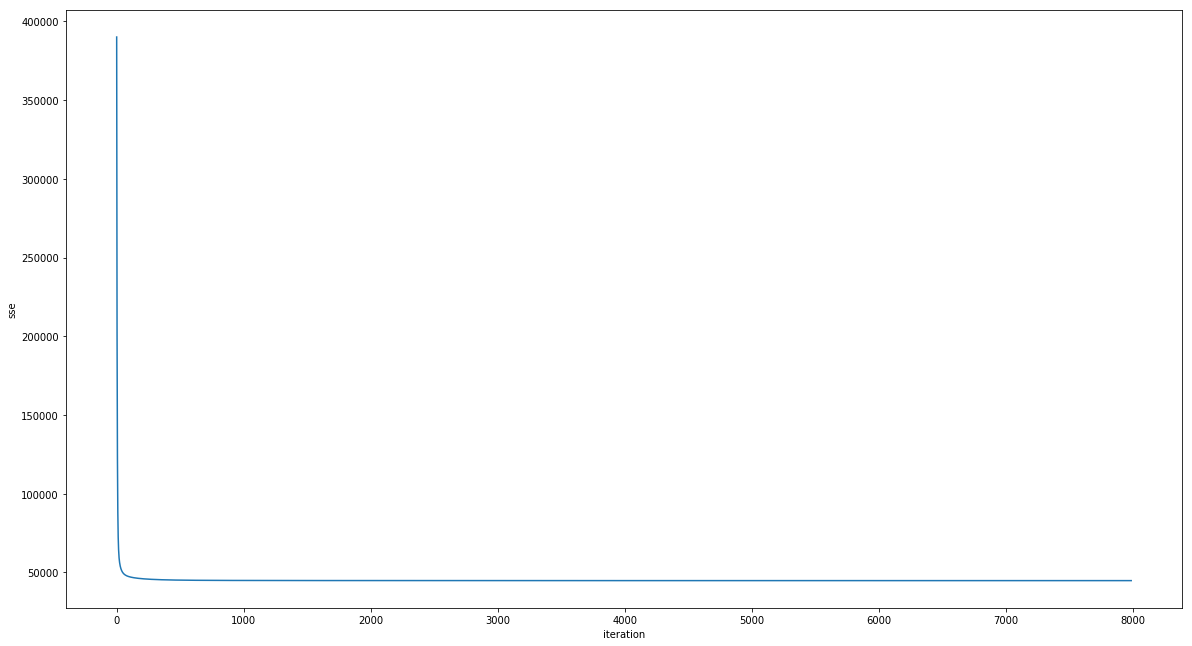

In [86]:

y=all_info[0.0001]['sse_for_each_iteration']
iteration = np.array([x for x in range(1,len(y)+1)])
data = pd.DataFrame({'iteration':iteration ,'sse':np.array(y)})

a4_dims = (20, 11)
fig, ax = plt.subplots(figsize=a4_dims)
sns.lineplot(ax=ax,x='iteration',y='sse',data=data,palette="husl")


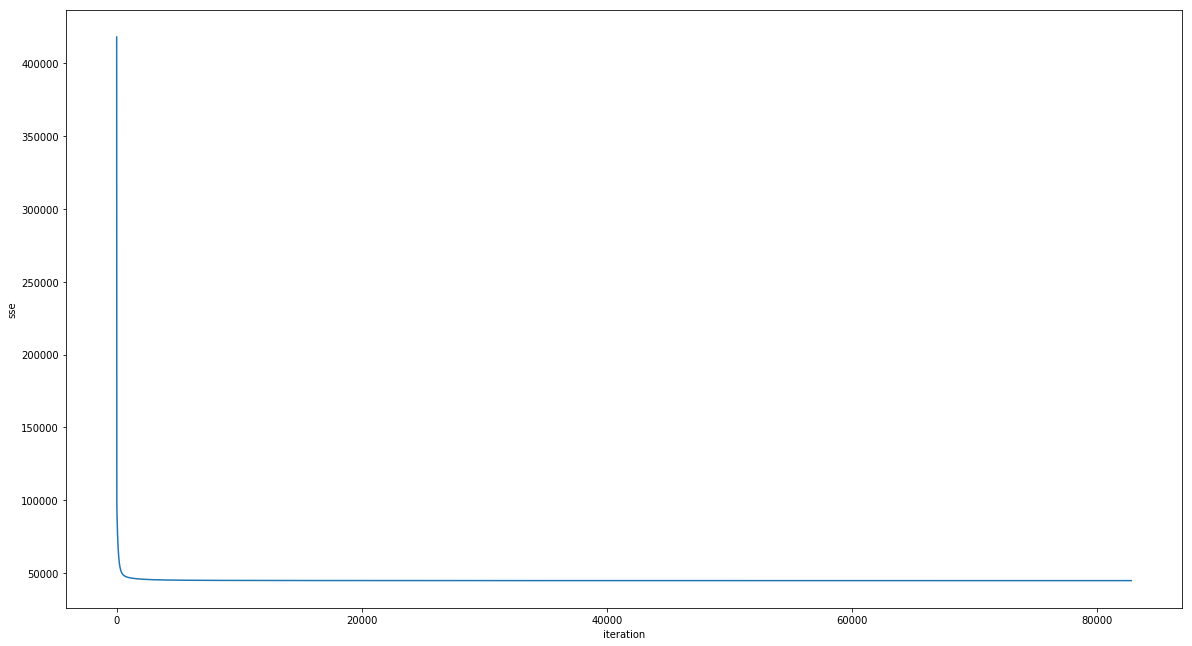

In [87]:

y=all_info[0.00001]['sse_for_each_iteration']
iteration = np.array([x for x in range(1,len(y)+1)])
data = pd.DataFrame({'iteration':iteration ,'sse':np.array(y)})

a4_dims = (20, 11)
fig, ax = plt.subplots(figsize=a4_dims)
sns.lineplot(ax=ax,x='iteration',y='sse',data=data,palette="Set1")


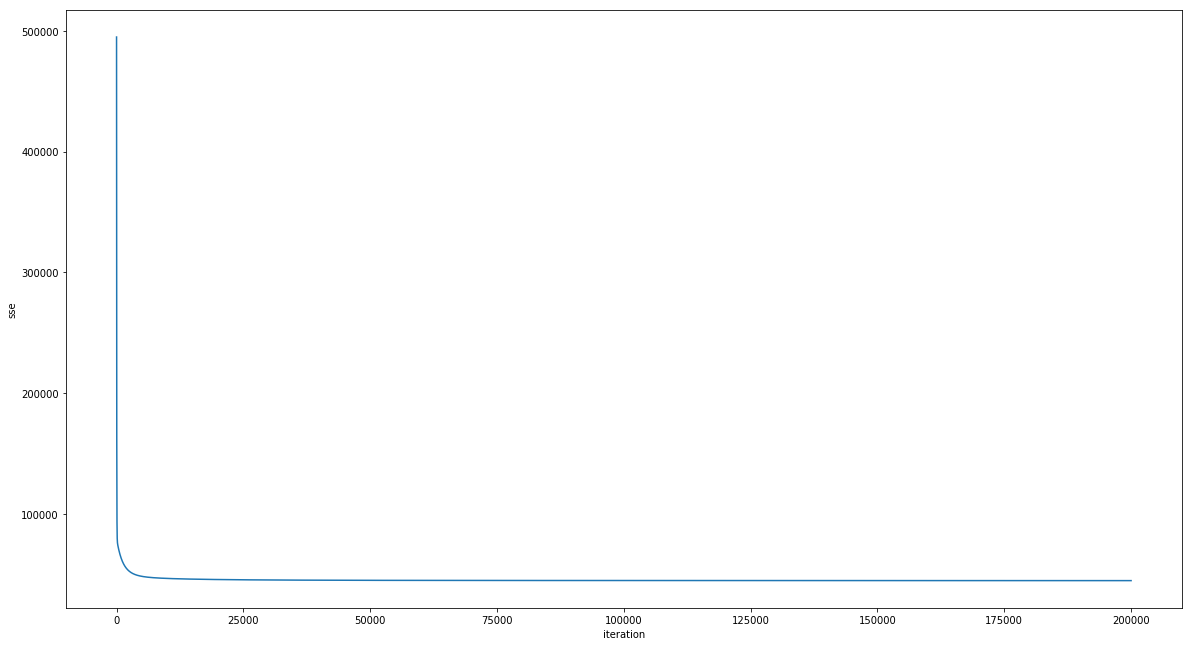

In [88]:

y=all_info[0.000001]['sse_for_each_iteration']
iteration = np.array([x for x in range(1,len(y)+1)])
data = pd.DataFrame({'iteration':iteration ,'sse':np.array(y)})

a4_dims = (20, 11)
fig, ax = plt.subplots(figsize=a4_dims)
sns.lineplot(ax=ax,x='iteration',y='sse',data=data,palette="Set1")


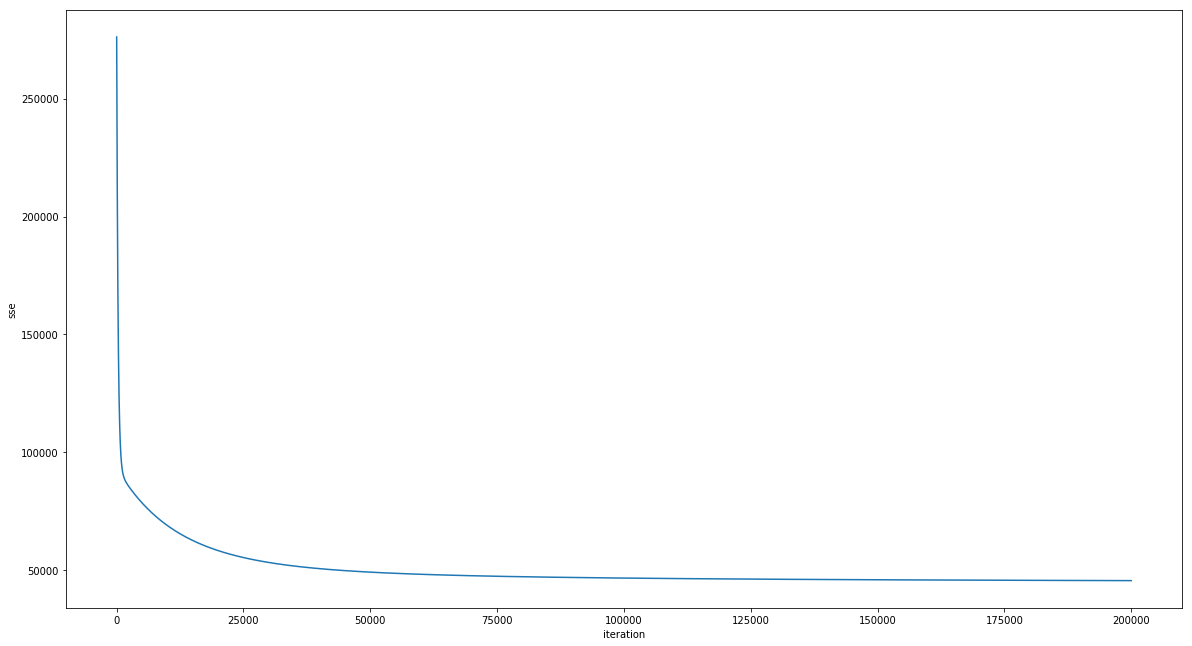

In [89]:

y=all_info[0.0000001]['sse_for_each_iteration']
iteration = np.array([x for x in range(1,len(y)+1)])
data = pd.DataFrame({'iteration':iteration ,'sse':np.array(y)})

a4_dims = (20, 11)
fig, ax = plt.subplots(figsize=a4_dims)
sns.lineplot(ax=ax,x='iteration',y='sse',data=data,palette="Set1")
